In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
path = '../data/'

# Import Data

In [3]:
orders = pd.read_csv(path + 'blinkit_orders.csv')
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [4]:
orders_items = pd.read_csv(path + 'blinkit_order_items.csv')
orders_items.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [5]:
products = pd.read_csv(path + 'blinkit_products.csv')
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [6]:
customers = pd.read_csv(path + 'blinkit_customers.csv')
customers.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [18]:
inventory = pd.read_csv(path + 'blinkit_inventory.csv')
inventory.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [8]:
marketing = pd.read_csv(path + 'blinkit_marketing_performance.csv')
marketing.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [9]:
customer_feedback = pd.read_csv(path + 'blinkit_customer_feedback.csv')
customer_feedback.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [27]:
delivery = pd.read_csv(path + 'blinkit_delivery_performance.csv')
delivery.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


# Data Cleaning

## Checking Data Types

In [10]:
orders.dtypes

order_id                    int64
customer_id                 int64
order_date                 object
promised_delivery_time     object
actual_delivery_time       object
delivery_status            object
order_total               float64
payment_method             object
delivery_partner_id         int64
store_id                    int64
dtype: object

Kolom `order_date`, `promised_delivery_time`,`actual_delivery_time` masih bertipe object, perlu diubah ke date time.

In [53]:
# Mengubah kolom ke datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['promised_delivery_time'] = pd.to_datetime(orders['promised_delivery_time'])
orders['actual_delivery_time'] = pd.to_datetime(orders['actual_delivery_time'])
orders['order_date_time'] = pd.to_datetime(orders['order_date']).dt.date

In [14]:
orders_items.dtypes

order_id        int64
product_id      int64
quantity        int64
unit_price    float64
dtype: object

In [15]:
products.dtypes

product_id             int64
product_name          object
category              object
brand                 object
price                float64
mrp                  float64
margin_percentage    float64
shelf_life_days        int64
min_stock_level        int64
max_stock_level        int64
dtype: object

In [16]:
inventory.dtypes

product_id         int64
date              object
stock_received     int64
damaged_stock      int64
dtype: object

Kolom date masih bertipe object, perlu diubah ke datetime

In [19]:
inventory['date'] = pd.to_datetime(inventory['date'])

C:\Users\prada\AppData\Local\Temp\ipykernel_27732\3751087986.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  inventory['date'] = pd.to_datetime(inventory['date'])


In [20]:
customers.dtypes

customer_id            int64
customer_name         object
email                 object
phone                  int64
address               object
area                  object
pincode                int64
registration_date     object
customer_segment      object
total_orders           int64
avg_order_value      float64
dtype: object

In [21]:
customers['registration_date'] = pd.to_datetime(customers['registration_date'])

In [22]:
customer_feedback.dtypes

feedback_id           int64
order_id              int64
customer_id           int64
rating                int64
feedback_text        object
feedback_category    object
sentiment            object
feedback_date        object
dtype: object

In [24]:
customer_feedback['feedback_date'] = pd.to_datetime(customer_feedback['feedback_date'])

In [25]:
marketing.dtypes

campaign_id            int64
campaign_name         object
date                  object
target_audience       object
channel               object
impressions            int64
clicks                 int64
conversions            int64
spend                float64
revenue_generated    float64
roas                 float64
dtype: object

In [26]:
marketing['date'] = pd.to_datetime(marketing['date'])

In [28]:
delivery.dtypes

order_id                   int64
delivery_partner_id        int64
promised_time             object
actual_time               object
delivery_time_minutes    float64
distance_km              float64
delivery_status           object
reasons_if_delayed        object
dtype: object

In [29]:
delivery['actual_time'] = pd.to_datetime(delivery['actual_time'])
delivery['promised_time'] = pd.to_datetime(delivery['promised_time'])

## Checking Null Value

In [30]:
orders.isnull().sum()

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64

In [31]:
orders_items.isnull().sum()

order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64

In [32]:
products.isnull().sum()

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [33]:
inventory.isnull().sum()

product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64

In [34]:
customers.isnull().sum()

customer_id          0
customer_name        0
email                0
phone                0
address              0
area                 0
pincode              0
registration_date    0
customer_segment     0
total_orders         0
avg_order_value      0
dtype: int64

In [35]:
customer_feedback.isnull().sum()

feedback_id          0
order_id             0
customer_id          0
rating               0
feedback_text        0
feedback_category    0
sentiment            0
feedback_date        0
dtype: int64

In [36]:
marketing.isnull().sum()

campaign_id          0
campaign_name        0
date                 0
target_audience      0
channel              0
impressions          0
clicks               0
conversions          0
spend                0
revenue_generated    0
roas                 0
dtype: int64

In [37]:
delivery.isnull().sum()

order_id                    0
delivery_partner_id         0
promised_time               0
actual_time                 0
delivery_time_minutes       0
distance_km                 0
delivery_status             0
reasons_if_delayed       1902
dtype: int64

## Export Data Clean

In [2]:
path_clean = '../data/clean/'

In [40]:
orders.to_csv(path_clean + 'orders.csv', index=False)
orders_items.to_csv(path_clean + 'orders_items.csv', index=False)
products.to_csv(path_clean + 'products.csv', index=False)
inventory.to_csv(path_clean + 'inventory.csv', index=False)
customers.to_csv(path_clean + 'customers.csv', index=False)
customer_feedback.to_csv(path_clean + 'customer_feedback.csv', index=False)
marketing.to_csv(path_clean + 'marketing.csv', index=False)
delivery.to_csv(path_clean + 'delivery.csv', index=False)

# Check Point Import Data

In [3]:
orders = pd.read_csv(path_clean + 'orders.csv')
orders_items = pd.read_csv(path_clean + 'orders_items.csv')
products = pd.read_csv(path_clean + 'products.csv')
inventory = pd.read_csv(path_clean + 'inventory.csv')
customers = pd.read_csv(path_clean + 'customers.csv')
customer_feedback = pd.read_csv(path_clean + 'customer_feedback.csv')
marketing = pd.read_csv(path_clean + 'marketing.csv')
delivery = pd.read_csv(path_clean + 'delivery.csv')

# Exploratory Data Analysis

In [45]:
N_observations, N_features = orders.shape
print(f'Jumlah Transaksi: {N_observations}')

Jumlah Transaksi: 5000


In [51]:
delivery_status = orders['delivery_status'].value_counts()
for status, count in delivery_status.items():
    print(f'{status}: {count}')

On Time: 3470
Slightly Delayed: 1037
Significantly Delayed: 493


In [49]:
print(f"Tanggal Awal Transaksi: {orders['order_date'].min()}")
print(f"Tanggal Akhir Transaksi: {orders['order_date'].max()}")
print(f"Durasi Transaksi: {orders['order_date'].max() - orders['order_date'].min()}")

Tanggal Awal Transaksi: 2023-03-16 08:10:44
Tanggal Akhir Transaksi: 2024-11-04 20:29:15
Durasi Transaksi: 599 days 12:18:31


In [50]:
print((f"Total Customers: {customers['customer_id'].nunique()}"))

Total Customers: 2500


## Identify Sales Trend

In [54]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,order_date_time
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,2024-07-17
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2024-05-28
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,2024-09-23
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,2023-11-24
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,2023-11-20


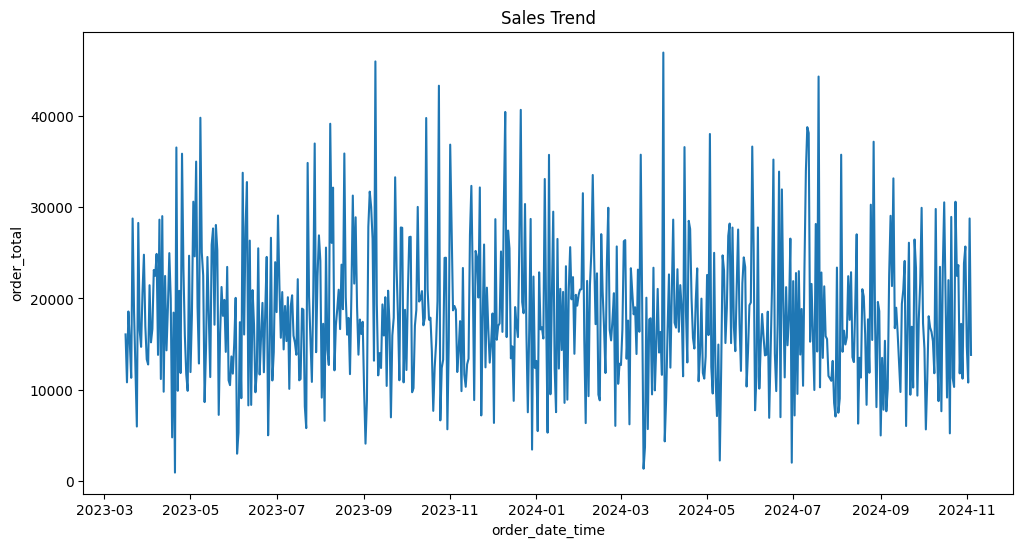

In [59]:
# Mengelompokan sales berdasarkan tanggal
sales_trend = orders.groupby('order_date_time')['order_total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='order_date_time', y='order_total')
plt.title('Sales Trend')
plt.show()

C:\Users\prada\AppData\Local\Temp\ipykernel_27732\2527174995.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = orders.groupby(pd.Grouper(key='order_date_time', freq='M'))['order_total'].sum().reset_index()


<Axes: xlabel='order_date_time'>

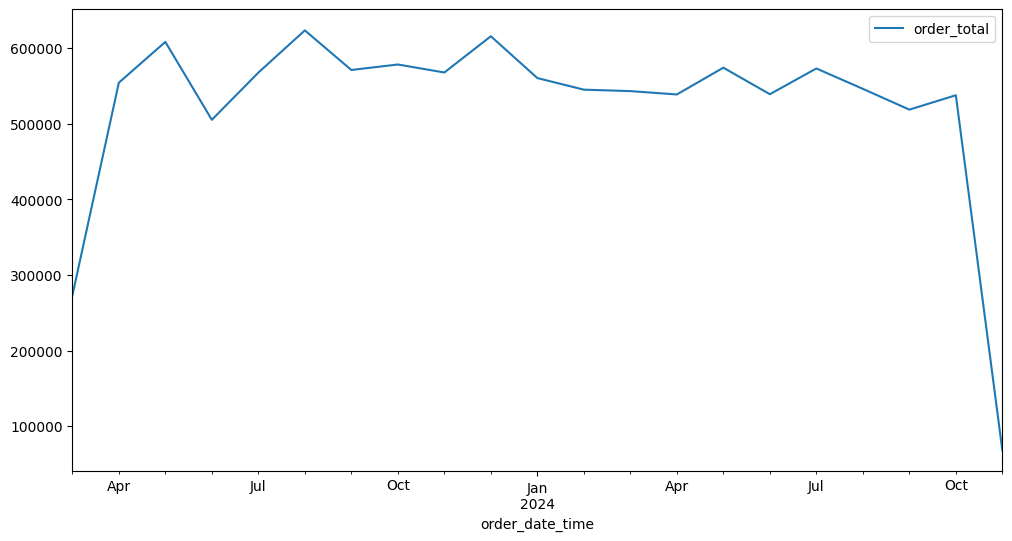

In [71]:
orders['order_date_time'] = pd.to_datetime(orders['order_date'])
monthly_sales = orders.groupby(pd.Grouper(key='order_date_time', freq='M'))['order_total'].sum().reset_index()

monthly_sales.plot(x='order_date_time', y='order_total', kind='line', figsize=(12, 6))

In [72]:
monthly_sales

,order_date_time,order_total
0,2023-03-31,272878.96
1,2023-04-30,554344.77
2,2023-05-31,608213.54
3,2023-06-30,505227.66
4,2023-07-31,567639.91
5,2023-08-31,623472.35
6,2023-09-30,571117.81
7,2023-10-31,578369.83
8,2023-11-30,567783.74
9,2023-12-31,615709.03


In [4]:
customer_feedback.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [23]:
feedback_category = customer_feedback[['feedback_category', 'rating']].value_counts()
average_rating = customer_feedback.groupby(['feedback_category'])['rating'].count().reset_index(name='count')
average_rating.sort_values(by='count', ascending=False)

,feedback_category,count
2,Delivery,1271
1,Customer Service,1266
3,Product Quality,1250
0,App Experience,1213


In [20]:
average_rating = customer_feedback.groupby(['feedback_category'])['rating'].mean().reset_index(name='count')
average_rating

,feedback_category,count
0,App Experience,3.361913
1,Customer Service,3.368088
2,Delivery,3.332809
3,Product Quality,3.315200


In [21]:
sentiment = customer_feedback['sentiment'].value_counts()
for sentiment, count in sentiment.items():
    print(f'{sentiment}: {count}')

Neutral: 1738
Negative: 1642
Positive: 1620


In [29]:
products_feedback = customer_feedback[customer_feedback['feedback_category'] == 'Product Quality']
products_feedback_negative = products_feedback[products_feedback['sentiment'] == 'Negative']
products_feedback_negative


,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
20,3769939,6625178717,62068277,2,Items were missing from my order.,Product Quality,Negative,2023-07-01
21,9592296,7169557514,84824280,2,Customer service was not helpful.,Product Quality,Negative,2023-03-21
27,1055307,964822979,88520326,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-07-13
29,7898352,9347571484,29562072,3,I had a bad experience.,Product Quality,Negative,2024-11-02
40,7512781,6771166303,87718744,3,The order was incorrect.,Product Quality,Negative,2023-07-24
...,...,...,...,...,...,...,...,...
4981,4436657,8732072897,12077371,2,Taste was not as expected.,Product Quality,Negative,2023-06-14
4984,1504694,2520527893,51476157,2,The order was incorrect.,Product Quality,Negative,2024-10-02
4987,5321532,5824924668,49881540,1,The order was incorrect.,Product Quality,Negative,2023-11-19
4991,5963618,4859489972,12305040,1,Taste was not as expected.,Product Quality,Negative,2023-07-15


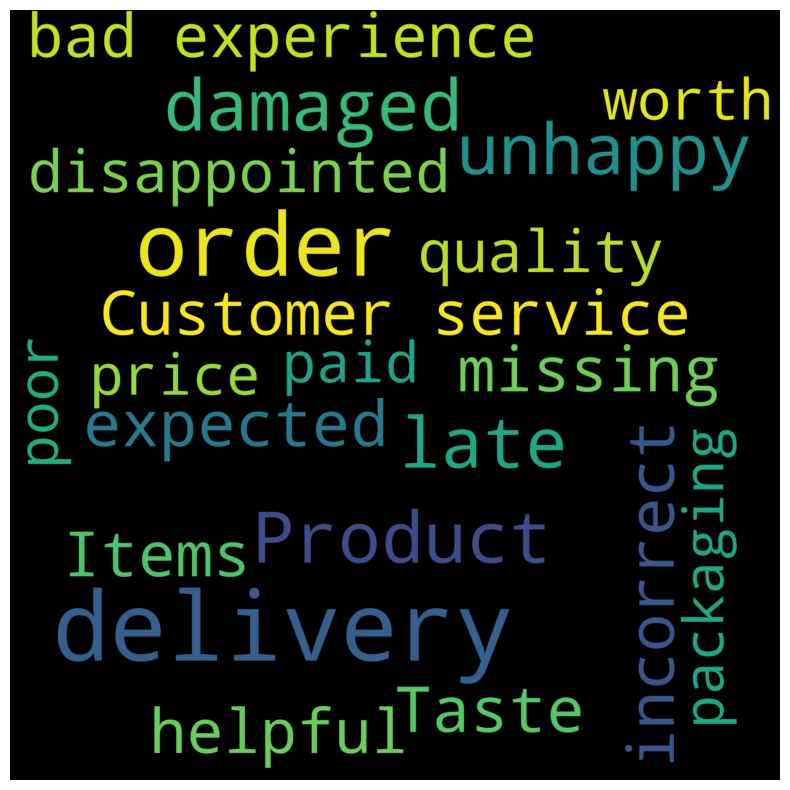

In [33]:
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(products_feedback_negative['feedback_text'].to_string())

# Pengaturan properti gambar
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()